In [76]:
# Import all packages needed
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import json
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [77]:
# Import style.json
style_path: Path = Path.cwd().parent / 'style' / 'style.json'
with open(style_path, 'r') as f: # opens the style.json file
    style: dict = json.load(f) # loads as a dictionary object

In [78]:
# Loading Data (data file must be in the same directory as jupyter notebook)
# Import data from excel file
# TODO: replace filename with the name of your data file
raw_data_filename: str ='2024_05_21 all data.xlsx'

# Tell program to read the data
raw_data: pd.DataFrame = pd.read_excel(raw_data_filename) # read data into a pandas dataframe by separating by "tabs" and there is no header

# Output data
raw_data

,Unnamed: 0,AU-026-B2-repeat,AU-026-B2,au-026-b2-fecl3,au-026-b2-f3cl3-repeat,au-026-b2-ptsa,au-026-b2-ptsa-repeat,AU-030-A2,au-030-a2-FECL3,AU-030-A2-PTSA,AU-045-D,AU-045-D-FECL3,au-045-d-ptsa
0,39.0,556.38013,3.47259,3.36967,2.25006,2.33169,26.45917,5.37320,10.45014,6.81401,4.17044,1.74553,5.12268
1,39.5,556.38013,3.47259,3.36967,2.25006,2.33169,26.45917,5.37320,10.45014,6.81401,4.17044,1.74553,5.12268
2,40.0,556.38013,3.47259,3.36967,2.25006,2.33169,26.45917,5.37320,10.45014,6.81401,4.17044,1.74553,5.12268
3,40.5,556.38013,3.47259,3.36967,2.25006,2.33169,26.45917,5.37320,10.45014,6.81401,4.17044,1.74553,5.12268
4,41.0,556.38013,3.47259,3.36967,2.25006,2.33169,26.45917,5.37320,10.45014,6.81401,4.17044,1.74553,5.12268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7318,3698.0,19.17355,1.58173,1.53081,1.82058,1.56754,2.31765,1.83407,3.55878,3.69733,2.92964,2.82248,1.77086
7319,3698.5,19.17355,1.58173,1.53081,1.82058,1.56754,2.31765,1.83407,3.55878,3.69733,2.92964,2.82248,1.77086
7320,3699.0,19.17355,1.58173,1.53081,1.82058,1.56754,2.31765,1.83407,3.55878,3.69733,2.92964,2.82248,1.77086
7321,3699.5,19.17355,1.58173,1.53081,1.82058,1.56754,2.31765,1.83407,3.55878,3.69733,2.92964,2.82248,1.77086


In [79]:
# Data preprocessing specific to RAMAN
def preprocess(data: pd.DataFrame, normalize: bool = False, baseline: bool = False):
    """Function that applies transformation to the dataframe which will make it ready for plotting. Note, this is specific to UV-Vis."""
    # Rename column names
    data = data.rename(
        columns={
            data.columns[0]: "Wavenumber ($\mathregular{cm^{-1}}$)", # rename the first column to Wavenumber cm^-1
        }
    )

    # Baseline correction
    if baseline: # if this is true, execute the following code
        col: str = data.columns[1] # get the column name of the Intensity by its column order in the dataframe
        data[col] = data[col] - np.average(data[col][0:50]) # subtract the average of the first 50 data points from the Intensity column

    # Normalize absorbance values
    if normalize: # if this is true, execute the following code
        col: str = data.columns[1] # get the column name of the Intensity by its column order in the dataframe
        max_val: float = data[col].max() # get the maximum value of the Intensity column
        data[col] = data[col] / max_val # divide the Intensity column by the maximum value of the Intensity column
        
    return data


# NOTE: change True to False if you don't want normalization or baseline correction
preprocessed_data: pd.DataFrame = preprocess(raw_data, False, False) # call the function we defined above
preprocessed_data

,Wavenumber ($\mathregular{cm^{-1}}$),AU-026-B2-repeat,AU-026-B2,au-026-b2-fecl3,au-026-b2-f3cl3-repeat,au-026-b2-ptsa,au-026-b2-ptsa-repeat,AU-030-A2,au-030-a2-FECL3,AU-030-A2-PTSA,AU-045-D,AU-045-D-FECL3,au-045-d-ptsa
0,39.0,556.38013,3.47259,3.36967,2.25006,2.33169,26.45917,5.37320,10.45014,6.81401,4.17044,1.74553,5.12268
1,39.5,556.38013,3.47259,3.36967,2.25006,2.33169,26.45917,5.37320,10.45014,6.81401,4.17044,1.74553,5.12268
2,40.0,556.38013,3.47259,3.36967,2.25006,2.33169,26.45917,5.37320,10.45014,6.81401,4.17044,1.74553,5.12268
3,40.5,556.38013,3.47259,3.36967,2.25006,2.33169,26.45917,5.37320,10.45014,6.81401,4.17044,1.74553,5.12268
4,41.0,556.38013,3.47259,3.36967,2.25006,2.33169,26.45917,5.37320,10.45014,6.81401,4.17044,1.74553,5.12268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7318,3698.0,19.17355,1.58173,1.53081,1.82058,1.56754,2.31765,1.83407,3.55878,3.69733,2.92964,2.82248,1.77086
7319,3698.5,19.17355,1.58173,1.53081,1.82058,1.56754,2.31765,1.83407,3.55878,3.69733,2.92964,2.82248,1.77086
7320,3699.0,19.17355,1.58173,1.53081,1.82058,1.56754,2.31765,1.83407,3.55878,3.69733,2.92964,2.82248,1.77086
7321,3699.5,19.17355,1.58173,1.53081,1.82058,1.56754,2.31765,1.83407,3.55878,3.69733,2.92964,2.82248,1.77086


/var/folders/zj/21gw6w117kx3yxv2p_zzq5600000gn/T/ipykernel_13127/2837622171.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


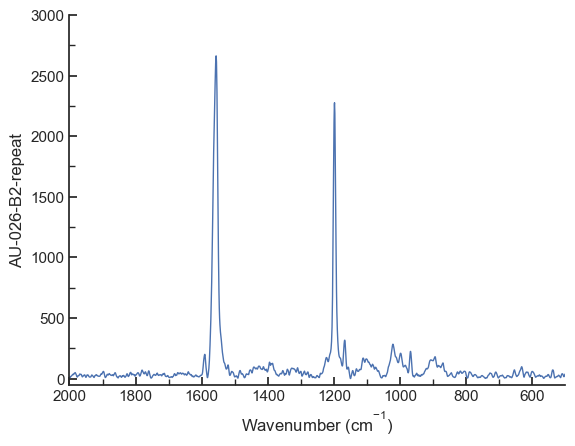

In [80]:
# Plot the data!
# NOTE: User must change the sample names to the correct column names.
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_context("notebook", rc={'figure.figsize':(11.7,8.27)}) # sets the size of the figure

# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data, # refers to dataframe that contains the data
    x="Wavenumber ($\mathregular{cm^{-1}}$)", # refers to column header to get all the X data
    y="AU-026-B2-repeat", # refers to column header to get all the Y data
    palette="rocket_r",  #NOTE: User can change the palette here
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)
sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(2000, 500)
# NOTE: User can change the y limits here
plt.ylim(-50, 3000)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("AU-026-B2-repeat.svg", dpi=300, bbox_inches="tight")
plt.savefig("UAU-026-B2-repeat.jpg", dpi=300, bbox_inches="tight")

/var/folders/zj/21gw6w117kx3yxv2p_zzq5600000gn/T/ipykernel_13127/431477691.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


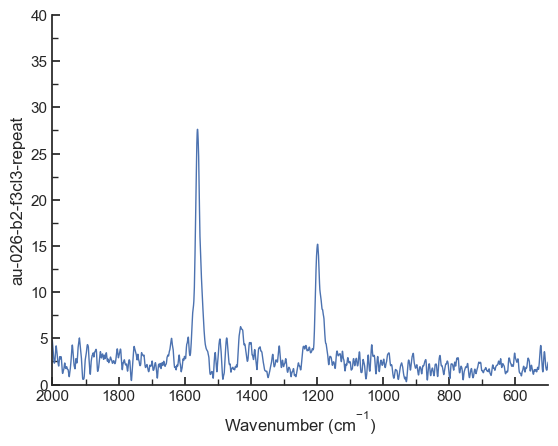

In [81]:
# Plot the data!
# NOTE: User must change the sample names to the correct column names.
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_context("notebook", rc={'figure.figsize':(11.7,8.27)}) # sets the size of the figure

# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data, # refers to dataframe that contains the data
    x="Wavenumber ($\mathregular{cm^{-1}}$)", # refers to column header to get all the X data
    y="au-026-b2-f3cl3-repeat", # refers to column header to get all the Y data
    palette="rocket_r",  #NOTE: User can change the palette here
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)
sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(2000, 500)
# NOTE: User can change the y limits here
plt.ylim(0, 40)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("au-026-b2-f3cl3-repeat.svg", dpi=300, bbox_inches="tight")
plt.savefig("au-026-b2-f3cl3-repeat.jpg", dpi=300, bbox_inches="tight")

/var/folders/zj/21gw6w117kx3yxv2p_zzq5600000gn/T/ipykernel_13127/4264641404.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


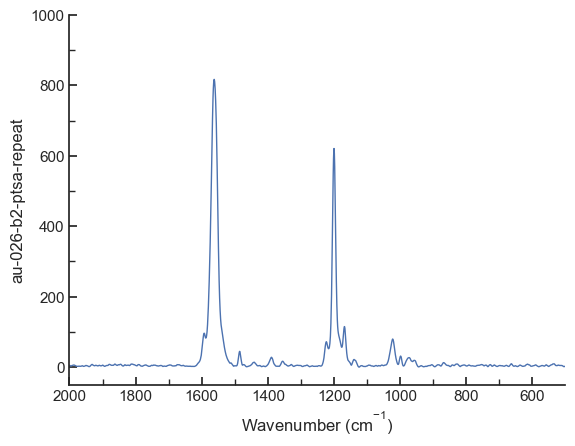

In [82]:
# Plot the data!
# NOTE: User must change the sample names to the correct column names.
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_context("notebook", rc={'figure.figsize':(11.7,8.27)}) # sets the size of the figure

# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data, # refers to dataframe that contains the data
    x="Wavenumber ($\mathregular{cm^{-1}}$)", # refers to column header to get all the X data
    y="au-026-b2-ptsa-repeat", # refers to column header to get all the Y data
    palette="rocket_r",  #NOTE: User can change the palette here
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)
sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(2000, 500)
# NOTE: User can change the y limits here
plt.ylim(-50, 1000)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("au-026-b2-ptsa-repeat.svg", dpi=300, bbox_inches="tight")
plt.savefig("au-026-b2-ptsa-repeat.jpg", dpi=300, bbox_inches="tight")

/var/folders/zj/21gw6w117kx3yxv2p_zzq5600000gn/T/ipykernel_13127/4106550034.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


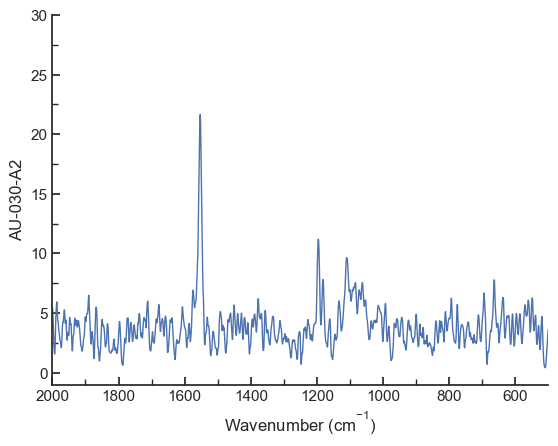

In [83]:
# Plot the data!
# NOTE: User must change the sample names to the correct column names.
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_context("notebook", rc={'figure.figsize':(11.7,8.27)}) # sets the size of the figure

# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data, # refers to dataframe that contains the data
    x="Wavenumber ($\mathregular{cm^{-1}}$)", # refers to column header to get all the X data
    y="AU-030-A2", # refers to column header to get all the Y data
    palette="rocket_r",  #NOTE: User can change the palette here
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)
sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(2000, 500)
# NOTE: User can change the y limits here
plt.ylim(-1, 30)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("AU-030-A2.svg", dpi=300, bbox_inches="tight")
plt.savefig("AU-030-A2.jpg", dpi=300, bbox_inches="tight")

/var/folders/zj/21gw6w117kx3yxv2p_zzq5600000gn/T/ipykernel_13127/2163375410.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


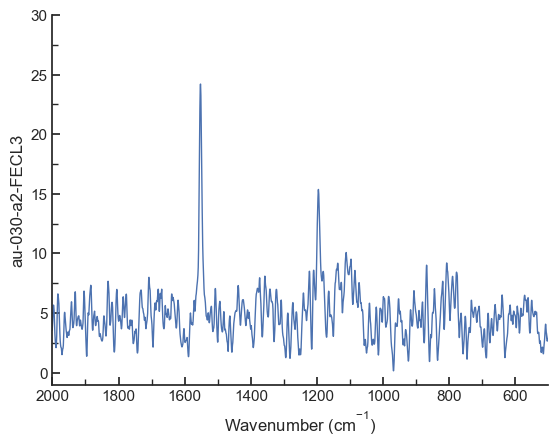

In [84]:
# Plot the data!
# NOTE: User must change the sample names to the correct column names.
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_context("notebook", rc={'figure.figsize':(11.7,8.27)}) # sets the size of the figure

# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data, # refers to dataframe that contains the data
    x="Wavenumber ($\mathregular{cm^{-1}}$)", # refers to column header to get all the X data
    y="au-030-a2-FECL3", # refers to column header to get all the Y data
    palette="rocket_r",  #NOTE: User can change the palette here
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)
sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(2000, 500)
# NOTE: User can change the y limits here
plt.ylim(-1, 30)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("au-030-a2-FECL3.svg", dpi=300, bbox_inches="tight")
plt.savefig("au-030-a2-FECL3.jpg", dpi=300, bbox_inches="tight")

/var/folders/zj/21gw6w117kx3yxv2p_zzq5600000gn/T/ipykernel_13127/911102868.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


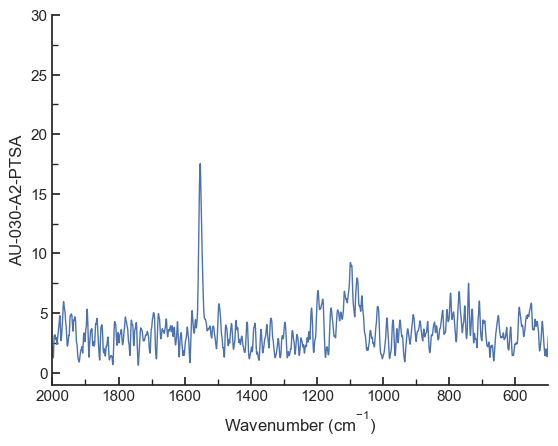

In [85]:
# Plot the data!
# NOTE: User must change the sample names to the correct column names.
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_context("notebook", rc={'figure.figsize':(11.7,8.27)}) # sets the size of the figure

# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data, # refers to dataframe that contains the data
    x="Wavenumber ($\mathregular{cm^{-1}}$)", # refers to column header to get all the X data
    y="AU-030-A2-PTSA", # refers to column header to get all the Y data
    palette="rocket_r",  #NOTE: User can change the palette here
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)
sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(2000, 500)
# NOTE: User can change the y limits here
plt.ylim(-1, 30)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("AU-030-A2-PTSA.svg", dpi=300, bbox_inches="tight")
plt.savefig("aAU-030-A2-PTSA.jpg", dpi=300, bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


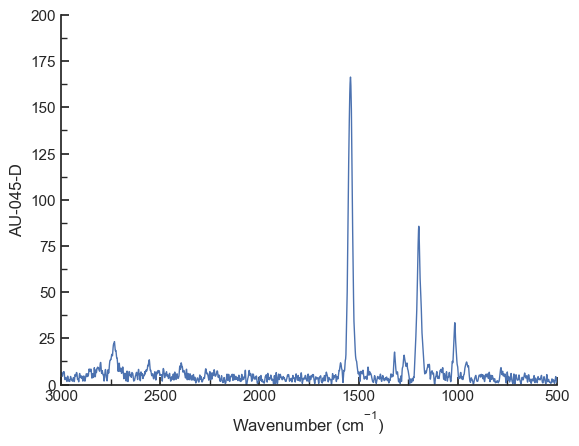

In [92]:
# Plot the data!
# NOTE: User must change the sample names to the correct column names.
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_context("notebook", rc={'figure.figsize':(11.7,8.27)}) # sets the size of the figure

# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data, # refers to dataframe that contains the data
    x="Wavenumber ($\mathregular{cm^{-1}}$)", # refers to column header to get all the X data
    y="AU-045-D", # refers to column header to get all the Y data
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)
sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(3000, 500)
# NOTE: User can change the y limits here
plt.ylim(0, 200)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("AU-045-D.svg", dpi=300, bbox_inches="tight")
plt.savefig("AU-045-D.jpg", dpi=300, bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


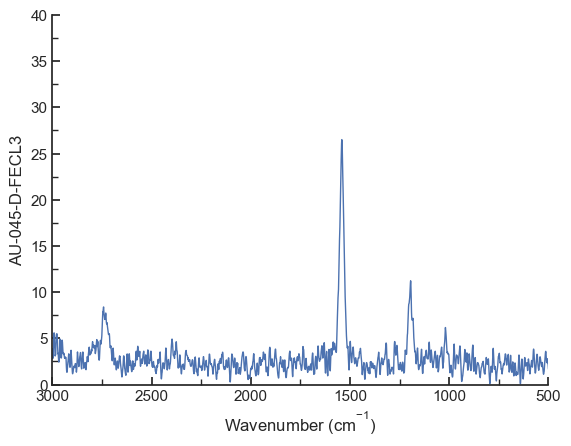

In [91]:
# Plot the data!
# NOTE: User must change the sample names to the correct column names.
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_context("notebook", rc={'figure.figsize':(11.7,8.27)}) # sets the size of the figure

# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data, # refers to dataframe that contains the data
    x="Wavenumber ($\mathregular{cm^{-1}}$)", # refers to column header to get all the X data
    y="AU-045-D-FECL3", # refers to column header to get all the Y data
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)
sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(3000, 500)
# NOTE: User can change the y limits here
plt.ylim(0, 40)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("AU-045-D-FECL3.svg", dpi=300, bbox_inches="tight")
plt.savefig("AU-045-D-FECL3.jpg", dpi=300, bbox_inches="tight")

/var/folders/zj/21gw6w117kx3yxv2p_zzq5600000gn/T/ipykernel_13127/1694063567.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


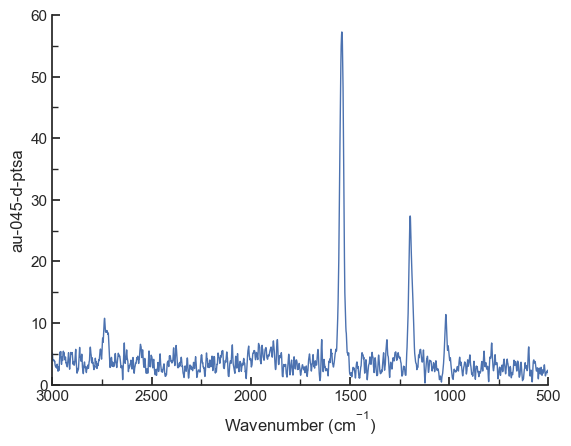

In [88]:
# Plot the data!
# NOTE: User must change the sample names to the correct column names.
# seaborn styles
sns.set_style("ticks")
sns.set_context("notebook") # gives the blank white background theme
# sns.set_context("notebook", rc={'figure.figsize':(11.7,8.27)}) # sets the size of the figure

# sns.set_theme(context="notebook", style="white", font="Helvetica")

graph = sns.lineplot(
    data=preprocessed_data, # refers to dataframe that contains the data
    x="Wavenumber ($\mathregular{cm^{-1}}$)", # refers to column header to get all the X data
    y="au-045-d-ptsa", # refers to column header to get all the Y data
    palette="viridis",  #NOTE: User can change the palette here
    linewidth=style["graph"]["default"]["line_thickness"], # refers to the thickness of the line in the graph (this is set in the style.json file)
)
sns.despine() # this removes the top and right spines of the graph

graph.legend(
    fontsize=style["legend"]["font_size"], # refers to the font size of the legend (this is set in the style.json file)
    bbox_to_anchor=(0.7, 0.7), # refers to the position of the legend anchored in the figure
    title_fontsize=style["legend"]["title_font_size"], # refers to the font size of the legend title
    shadow=False, # refers to whether the legend has a shadow or not
    frameon=False, # refers to whether the legend has a frame or not
)
# font family
plt.rcParams['font.family'] = style["graph"]["default"]["font_family"] # refers to the font family of the text in the graph (this is set in the style.json file)

# y-axis and x-axis ticks
graph.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X axis
graph.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y axis
graph.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
graph.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
graph.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
graph.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# NOTE: User can change the x and y limits here
plt.xlim(3000, 500)
# NOTE: User can change the y limits here
plt.ylim(0, 60)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Save the figure
# NOTE: User can change the filename
plt.savefig("au-045-d-ptsa.svg", dpi=300, bbox_inches="tight")
plt.savefig("au-045-d-ptsa.jpg", dpi=300, bbox_inches="tight")